In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io

In [2]:
file=scipy.io.loadmat('D:/ML Andrew Ngs/Week6/machine-learning-ex5/ex5/ex5data1.mat')

In [3]:
X=file['X']
Y=file['y']
Xval=file['Xval']
Yval=file['yval']
Xtest=file['Xtest'] # unseen X data
Ytest=file['ytest'] # unseen Y data

In [4]:
m,n=X.shape[0],X.shape[1]

In [5]:
# visulalizing the data

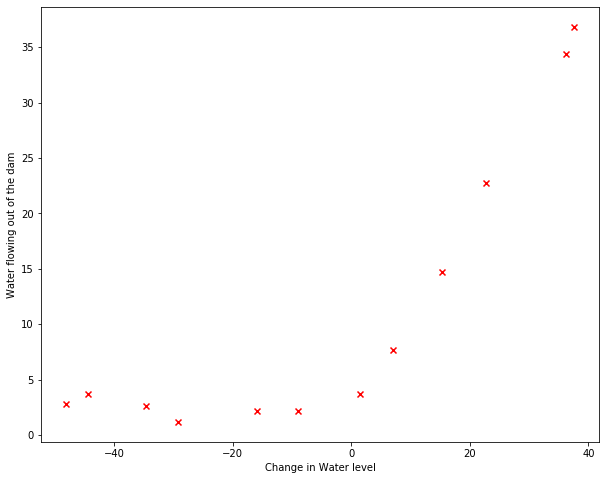

In [6]:
fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(X,Y,marker='x',c='red')
ax.set_xlabel('Change in Water level')
ax.set_ylabel('Water flowing out of the dam')

ax.plot();

In [7]:
ones=np.ones((m,1))
X_new=np.hstack((ones,X))
theta=np.ones((n+1,1))
lamda=1

In [8]:
def lrCostfunction(theta,X,Y,lamda):
    '''Function will return regularized Cost function'''
    h=np.dot(X,theta)
    cost=1/(2*m)*np.sum((h - Y)**2)
    J=cost+lamda/(2*m)*(np.sum(theta[1:]**2))
    return(J)

In [9]:
def lrGradient(theta,X,Y,lamda):
    '''Function will return regularized Gradient'''
    h=np.dot(X,theta)
    err=h-Y
    grad=np.zeros((2,1))
    grad=(1/m)*(np.dot(X.T,err))
    grad[1:]=grad[1:]+(lamda/(m))*(theta[1:])
    return(grad)

In [10]:
int_cost=lrCostfunction(theta,X_new,Y,lamda)
int_grad=lrGradient(theta,X_new,Y,lamda)
print('Initial regularized cost is {} and Gradient is {}'.format(int_cost,int_grad))

Initial regularized cost is 303.9931922202643 and Gradient is [[-15.30301567]
 [598.25074417]]


In [11]:
def trainLinearReg(in_theta,X,Y,lamda):
    result = opt.fmin_tnc(func=lrCostfunction, x0=in_theta, fprime=lrGradient, args=(X,Y.flatten(),lamda))
    return(result[0].reshape((X.shape[1],1)))

In [12]:
optimised_theta=trainLinearReg(theta,X_new,Y,1)
print("value of optimised theta is {}".format(optimised_theta))

value of optimised theta is [[13.08771391]
 [ 0.36774199]]


In [13]:
# Plotting the linear regresion line

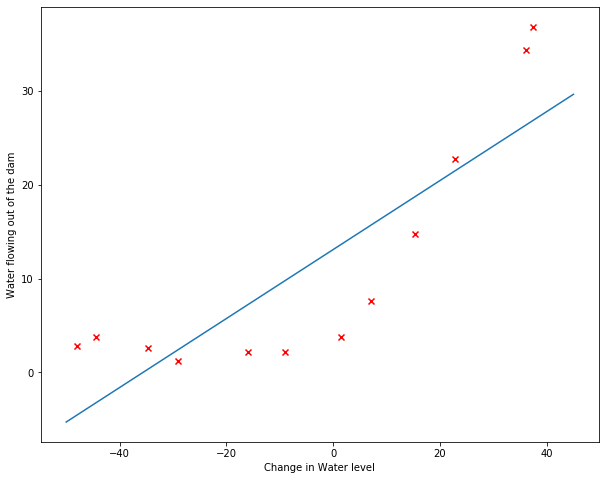

In [14]:
fig,ax=plt.subplots(figsize=(10,8))

x_line=np.arange(-50,50,5)
y_line=optimised_theta[0]+optimised_theta[1]*x_line

ax.scatter(X,Y,marker='x',c='red')
ax.set_xlabel('Change in Water level')
ax.set_ylabel('Water flowing out of the dam')

ax.plot(x_line,y_line);

In [15]:
# 2. Bias vs Variance

In [16]:
val_ones=np.ones((Xval.shape[0],1))
Xval_new=np.hstack((val_ones,Xval))

In [17]:
def Learningcurve(X,Y,Xval,Yval,lamda):
    train_err=[]
    cv_err=[]
    initial_theta=np.ones((X.shape[1],1))
    for i in range(1,X.shape[0]+1):
        theta_t=trainLinearReg(initial_theta,X[0:i,:],Y[0:i],lamda)
        train_err.append(lrCostfunction(theta_t,X[0:i,:],Y[0:i],lamda))
        cv_err.append(lrCostfunction(theta_t,Xval,Yval,lamda))
    return(train_err,cv_err)

In [18]:
err_train,err_cv=Learningcurve(X_new,Y,Xval_new,Yval,1)

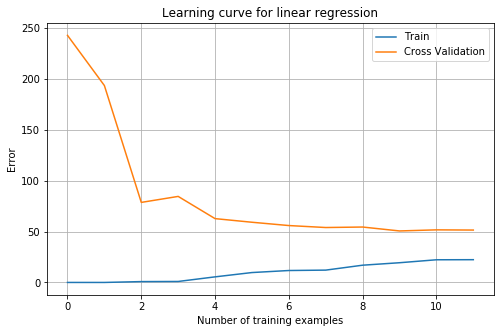

In [19]:
mym=list(range(12))
plt.figure(figsize=(8,5))
plt.plot(mym,err_train,label='Train')
plt.plot(mym,err_cv,label='Cross Validation')
plt.legend()
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.grid(True)